Linear regression is a popular statistical modeling technique used to establish a relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables and aims to find the best-fitting line that minimizes the sum of the squared differences between the observed and predicted values.


In linear regression, the dependent variable is predicted based on the values of the independent variables. The model estimates the coefficients (slopes) and the intercept of the linear equation that represents the relationship between the variables.

The equation for simple linear regression with one independent variable is:

y = b0 + b1 * x

where:

- y is the dependent variable
- x is the independent variable
- b0 is the intercept (the value of y when x is 0)
- b1 is the coefficient (the slope of the line)






The goal of linear regression is to estimate the value of b0 and b1 that best fit the data. This is typically done using a method called Ordinary Least Squares (OLS), which minimizes the sum of the squared differences between the observed and predicted values. 

Linear regression can be extended to multiple independent variable, resulting in multiple linear regression. The equation becomes:

y = b0 + b1 * x1 + b2 * x2 + ... + bn * xn

where:
- x1, x2, ... are the independent variables
- b1, b2, ... are the coefficients for each independent variable




The coefficients in linear regression represent the change in the dependent variable for 1 unit change in corresponding independent variable, assuming all the other independent variables stay constant. 

Linear regr. is used in various fields including economics, social sciences, finance and machine learning, to analyze and predict the relationship between variables and make forecasts based on the observed data. 

In Python, you can perform linear regression using libraries such as scikit-learn, statsmodels or numpy. These libraries provide functions and classes to fit a linear regression model to your data and make predictions based on the learned coefficients.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Dataset:

The training dataset is a CSV file with 700 data pairs (x,y). The x-values are numbers between 0 and 100. The corresponding y-values have been generated using the Excel function NORMINV(RAND(), x, 3). Consequently, the best estimate for y should be x.
The test dataset is a CSV file with 300 data pairs.

In [3]:
file_folder = 'C:/Users/danac/Desktop/Python/'

In [4]:
train_df = pd.read_csv(file_folder+ 'Simple Linear Regression/linear_reg_train.csv')

In [5]:
train_df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


### Exploratory Data Analysis

In [6]:
train_df.isnull().sum()

x    0
y    1
dtype: int64

In [7]:
train_df.isna().any()

x    False
y     True
dtype: bool

In [8]:
len(train_df)

700

In [9]:
train_df.shape[0]

700

In [10]:
### get percentage of null data:

print('The percentage of missing "y" variable is %0.3f%%' % ((train_df.y.isnull().sum()/train_df.shape[0] )*100))

The percentage of missing "y" variable is 0.143%


Safe to delete the null record form the data frame

In [11]:
train_df.dropna(inplace=True)

#### Data splitting

In [12]:
# splitting into training and test sets:

X_train, X_test, y_train, y_test = train_test_split(train_df[['x']], train_df['y'], test_size= 0.8)

### Linear regression model:

In [13]:
model = LinearRegression()

In [14]:
# Fit the model to the training data:

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Make predictions

In [15]:
y_pred = model.predict(X_test)

### Visualization:

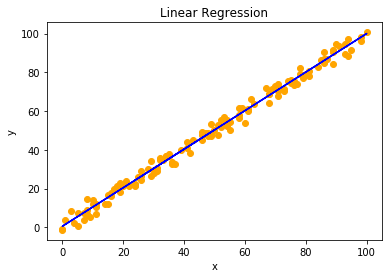

In [16]:
# plot the data and the regression line:

plt.scatter(X_train, y_train, color = 'orange')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.xlabel('x')
plt.ylabel('y')

plt.title('Linear Regression')
plt.show()


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', f"{mse:,.2f}")
print('R-squared (R2):', f"{r2:,.2f}")


Mean Squared Error (MSE): 8.40
R-squared (R2): 0.99


In [23]:
len(y_pred)

560

In [24]:
X_test['predicted_values']= model.predict(X_test)

In [25]:
X_test.head()

,x,predicted_values
639,1.0,1.578905
389,9.0,9.534530
647,93.0,93.068591
101,13.0,13.512343
96,0.0,0.584452
